<a href="https://colab.research.google.com/github/oroobyaseen/coursera.exercises/blob/gh-pages/VGG16_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [228, 228]

train_path = '/content/drive/MyDrive/Lec/Train'
valid_path = '/content/drive/MyDrive/Lec/Val'

In [6]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [7]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Lec/Train/*')

In [9]:
folders

['/content/drive/MyDrive/Lec/Train/Glioma',
 '/content/drive/MyDrive/Lec/Train/Meningioma',
 '/content/drive/MyDrive/Lec/Train/Pituitary tumor']

In [10]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [11]:
len(folders)

3

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 228, 228, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 228, 228, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 228, 228, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 114, 114, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 114, 114, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 114, 114, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 57, 57, 128)       0     

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                shear_range=0.5,
                                zoom_range=(0.9, 1.1),
                                horizontal_flip=False,
                                vertical_flip=False,
                                fill_mode='constant',
                                cval=0,
                                validation_split=0.25   
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Lec/Train',
                                                 target_size = (228, 228),
                                                 batch_size = 128,
                                                 seed=42,
                                                 shuffle=True,
                                                 class_mode = 'categorical')

Found 2459 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Lec/Val',
                                            target_size = (228, 228),
                                            batch_size = 128,
                                            seed=42,
                                            shuffle=True,
                                            class_mode = 'categorical')

Found 616 images belonging to 3 classes.


In [18]:
#@title Default title text
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,

)

Epoch 1/20
20/20 [==============================] - 577s 28s/step - loss: 1.2258 - accuracy: 0.5933 - val_loss: 0.5452 - val_accuracy: 0.7208
Epoch 2/20
20/20 [==============================] - 42s 2s/step - loss: 0.4540 - accuracy: 0.8036 - val_loss: 0.3677 - val_accuracy: 0.8182
Epoch 3/20
20/20 [==============================] - 41s 2s/step - loss: 0.3520 - accuracy: 0.8642 - val_loss: 0.3192 - val_accuracy: 0.8523
Epoch 4/20
20/20 [==============================] - 43s 2s/step - loss: 0.3133 - accuracy: 0.8735 - val_loss: 0.2888 - val_accuracy: 0.8669
Epoch 5/20
20/20 [==============================] - 41s 2s/step - loss: 0.2915 - accuracy: 0.8833 - val_loss: 0.2726 - val_accuracy: 0.8912
Epoch 6/20
20/20 [==============================] - 43s 2s/step - loss: 0.2610 - accuracy: 0.8939 - val_loss: 0.2719 - val_accuracy: 0.8604
Epoch 7/20
20/20 [==============================] - 41s 2s/step - loss: 0.2462 - accuracy: 0.9089 - val_loss: 0.2406 - val_accuracy: 0.8945
Epoch 8/20
20/20 [

In [29]:
from tensorflow.keras.models import load_model

model.save('model_VGG16-h5')

In [30]:
test_model = load_model('/content/model_VGG16-h5')
predictions = test_model.predict_generator(test_set, steps=1, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [31]:
predictions

array([[1.63856074e-01, 8.16270113e-01, 1.98737625e-02],
       [3.87212746e-02, 9.36590791e-01, 2.46880427e-02],
       [9.98750806e-01, 7.54087116e-04, 4.95054119e-04],
       [2.50814308e-04, 5.61088230e-03, 9.94138360e-01],
       [6.04081094e-01, 3.93127739e-01, 2.79112952e-03],
       [9.98817205e-01, 1.02864415e-03, 1.54169014e-04],
       [9.99753058e-01, 1.93283689e-04, 5.36695152e-05],
       [1.29179074e-03, 1.75072595e-01, 8.23635638e-01],
       [7.38443166e-04, 5.41319232e-03, 9.93848383e-01],
       [4.21120405e-01, 5.62880456e-01, 1.59991048e-02],
       [8.97863925e-01, 1.01965308e-01, 1.70761516e-04],
       [9.95745242e-01, 4.25463496e-03, 7.85796743e-08],
       [1.64244902e-05, 5.30052045e-03, 9.94683087e-01],
       [1.90925854e-03, 5.81284821e-01, 4.16805893e-01],
       [3.38605046e-02, 9.52241838e-01, 1.38976891e-02],
       [9.78990257e-01, 2.09933948e-02, 1.63158493e-05],
       [1.47654429e-01, 8.52229297e-01, 1.16284573e-04],
       [9.83106971e-01, 1.62580

In [32]:
rounded_prediction = np.argmax(predictions, axis=-1)
for i in rounded_prediction:
    print(i)


1
1
0
2
0
0
0
2
2
1
0
0
2
1
1
0
1
0
0
2
1
1
2
0
0
0
0
2
2
2
1
2
0
2
0
1
0
0
2
2
0
0
2
0
2
0
0
0
2
0
0
0
2
1
0
0
0
1
0
2
0
2
1
0
1
1
0
2
2
1
0
0
2
1
0
1
0
1
0
2
0
2
0
0
1
2
0
0
0
1
2
1
0
2
2
1
0
0
2
0
0
1
0
2
0
2
2
2
0
0
2
2
1
2
0
2
2
1
2
2
1
1
2
1
1
2
1
0


In [35]:
import math
batch_size = 128

In [36]:
# Function to get labels from generators to separate them
def get_labels(gen):
    labels = []
    sample_no = len(gen.filenames)
    call_no = int(math.ceil(sample_no / batch_size))
    for i in range(call_no):
        labels.extend(np.array(gen[i][1]))
    
    return np.array(labels)

In [37]:

valid_labels = get_labels(test_set)

In [44]:
cm = confusion_matrix(y_true= rounded_labels, y_pred=rounded_prediction)

In [42]:
test_batches= test_datagen.flow_from_directory('/content/drive/MyDrive/Lec/Val',
                                            target_size = (228, 228),
                                            batch_size = 128,
                                            seed=42,
                                            shuffle=True,
                                            class_mode = 'categorical')

Found 616 images belonging to 3 classes.


In [43]:
test_imgs, test_labels = next(test_batches)
#plots(test_imgs, rows=10, titles=test_labels)
rounded_labels = np.argmax(test_labels, axis=-1)

In [45]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(y_true=rounded_labels, y_pred=rounded_prediction))

              precision    recall  f1-score   support

           0       0.49      0.43      0.46        63
           1       0.26      0.24      0.25        33
           2       0.17      0.22      0.19        32

    accuracy                           0.33       128
   macro avg       0.31      0.30      0.30       128
weighted avg       0.35      0.33      0.34       128



In [46]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


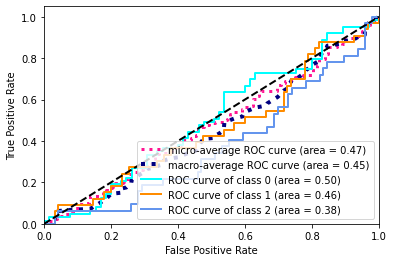

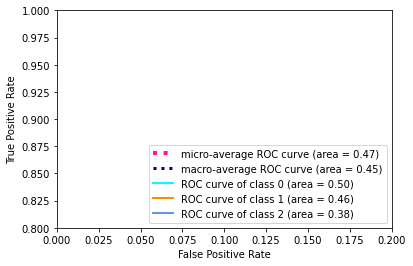

In [48]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=3)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=3)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from itertools import cycle
from sklearn import metrics
from scipy import interp
import os
import shutil
from keras import backend as K
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [19]:
import matplotlib.pyplot as plt

In [20]:
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set), verbose=1)
print('Loss: %.3f' % (test_loss * 100.0))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

5/5 [==============================] - 5s 774ms/step - loss: 0.1978 - accuracy: 0.9302
Loss: 19.779
Accuracy: 93.019


In [21]:
training_accuracy_cn      = r.history['accuracy'][-1]
training_loss_cn          = r.history['loss'][-1]
validation_accuracy_cn    = r.history['val_accuracy'][-1]
validation_loss_cn        = r.history['val_loss'][-1]
print("Training Accuracy VGG16    :", training_accuracy_cn )
print("Training Loss VGG16       :", training_loss_cn)
print("Validation Accuracy VGG16 :", validation_accuracy_cn)
print("Validation Loss VGG16      :", validation_loss_cn)

Training Accuracy VGG16    : 0.9483529925346375
Training Loss VGG16       : 0.14230714738368988
Validation Accuracy VGG16 : 0.9301947951316833
Validation Loss VGG16      : 0.19778625667095184


In [22]:
from sklearn.metrics import classification_report

In [23]:
import sklearn

In [24]:
from sklearn.metrics import plot_confusion_matrix


In [25]:
from sklearn.metrics import confusion_matrix

In [27]:

CLASSES = [ 'Glioma',
           'Meningioma',
           'Pituitary tumor',
            ]

In [28]:
# Generating Confusion Matrix and Classification Report
predictions = np.argmax(model.predict(test_set),axis=1)
labels = test_set.classes
print('Confusion Matrix')
conf_matrix_cn = confusion_matrix(test_set.classes, predictions)
cm_cn = np.array2string(conf_matrix_cn)
print(conf_matrix_cn)
print("=============================================================================================")
print('Classification Report')
# target_names = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9']
class_rep_cn = classification_report(test_set.classes, predictions, target_names=CLASSES)
print(class_rep_cn)

Confusion Matrix
[[115  74  97]
 [ 67  31  44]
 [ 85  45  58]]
Classification Report
                 precision    recall  f1-score   support

         Glioma       0.43      0.40      0.42       286
     Meningioma       0.21      0.22      0.21       142
Pituitary tumor       0.29      0.31      0.30       188

       accuracy                           0.33       616
      macro avg       0.31      0.31      0.31       616
   weighted avg       0.34      0.33      0.33       616



In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[139  55  92]
 [ 73  27  42]
 [ 85  41  62]]


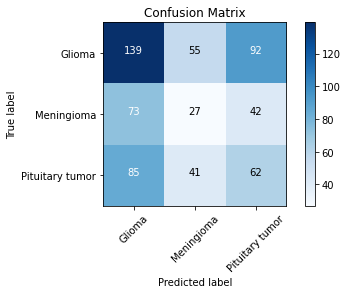

In [ ]:
plot_confusion_matrix(cm=conf_matrix_cn, classes=CLASSES, title='Confusion Matrix')


In [ ]:
predictions = np.argmax(model.predict(test_set),axis=1)
labels = test_set.classes
predictions , labels

(array([0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0,
        1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0,
        0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0,
        2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2,
        2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0,
        0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0,
        0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0,
        2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 0,
        1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0,
        0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2,
        0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0,
        1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2,
        1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 

In [ ]:
from matplotlib.pyplot import *


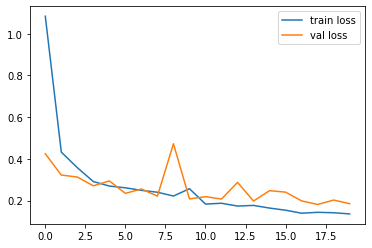

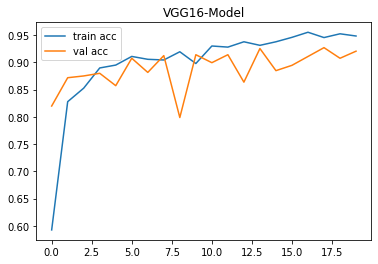

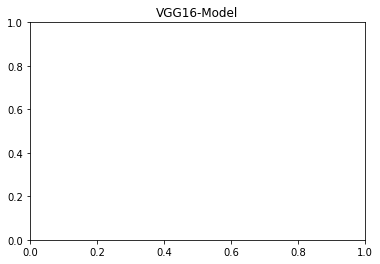

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.title('VGG16-Model')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
plt.title('VGG16-Model')
plt.show()

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')